# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


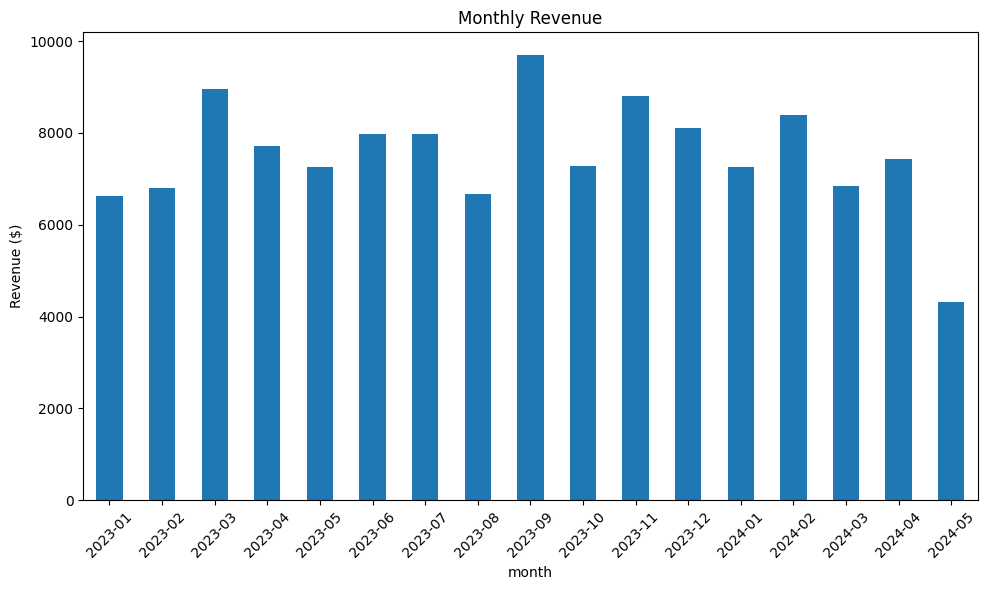

In [ ]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [4]:
# Your code here
df["order_date"] = pd.to_datetime(df["order_date"])
df["quarter"] = df["order_date"].dt.to_period("Q")
df["month"] = df["order_date"].dt.to_period("M")

quarterly_revenue_entire = df.groupby("quarter")["revenue"].sum()
quarter = df["quarter"].max()
last_quarter = df[df["quarter"] == quarter]
quarterly_revenue = last_quarter.groupby("month")["revenue"].sum()

print("Last Quarterly Revenue:")
print(quarterly_revenue)
print()
print("Entire Quarterly Revenue")
print(quarterly_revenue_entire)


Last Quarterly Revenue:
month
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64

Entire Quarterly Revenue
quarter
2023Q1    22382.79
2023Q2    22962.74
2023Q3    24354.35
2023Q4    24202.56
2024Q1    22493.23
2024Q2    11745.00
Freq: Q-DEC, Name: revenue, dtype: float64


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


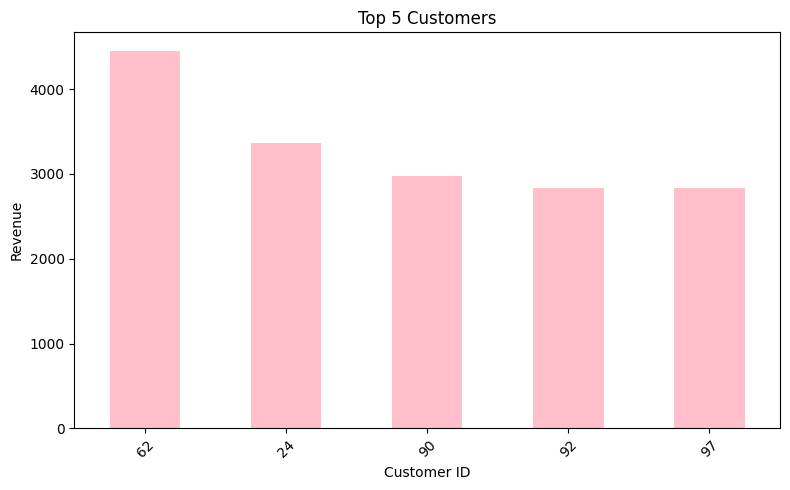

In [5]:
# Your code here
top_customers = (df.groupby("customer_id")["revenue"].sum().sort_values(ascending=False).head(5))
print(top_customers)

plt.figure(figsize=(8,5))
top_customers.plot(kind="bar", color="pink")

plt.title("Top 5 Customers")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [19]:
# Your code here
customer_revenue = df.groupby("customer_segment")["revenue"].mean().round(2).sort_values(ascending=False)

print("On average, seniors spend the most per order:")
print(customer_revenue)


On average, seniors spend the most per order:
customer_segment
Senior          262.13
Professional    255.65
Student         253.81
Name: revenue, dtype: float64


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [18]:
# Your code here
top_region = (df.groupby("region")["revenue"].sum().sort_values(ascending=False).head(1))
print("The region that generated the highest revenue is", top_region)

print()
region_order_size = df.groupby('region')['quantity'].mean().round(2).sort_values(ascending=False)
print("On average, the West spends the most per order:")
print(region_order_size)


The region that generated the highest revenue is region
South    34839.45
Name: revenue, dtype: float64

On average, the West spends the most per order:
region
West     2.63
East     2.47
South    2.44
North    2.36
Name: quantity, dtype: float64


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [9]:
# Your code here
popular_quantity = df.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
popular_revenue = df.groupby("product_category")["revenue"].sum().sort_values(ascending=False)

print("Most Popular Quantity Sold:")
print(popular_quantity)
print()
print("Most Popular by Revenue:")
print(popular_revenue)


Most Popular Quantity Sold:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Most Popular by Revenue:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [20]:
# Your code here
# discounted_revenue = df.groupby("discount_applied")["revenue"].sum().sort_values(ascending=False)
# print(discounted_revenue)

print("Average Revenue per Order (non-discounted vs discounted):")
df["discounted"] = df["discount_applied"] > 0
avg_revenue = df.groupby("discounted")["revenue"].mean().round(2)
print(avg_revenue)

Average Revenue per Order (non-discounted vs discounted):
discounted
False    248.30
True     263.83
Name: revenue, dtype: float64


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [28]:
# Your code here
payment_percentages = df["payment_method"].value_counts(normalize = True) * 100
print("Percent by Payment Method:")
print(payment_percentages)

print()
spending = df.groupby("payment_method")["revenue"].mean().sort_values(ascending=False)
print(spending)
print("Customers who pay with Credit Card tend to have higher percentages, but not enough to assume higher spending.")

Percent by Payment Method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64
Customers who pay with Credit Card tend to have higher percentages, but not enough to assume higher spending.


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

 The weekdays are usually busier than the weekends, with sunday bringing in the least revenue.


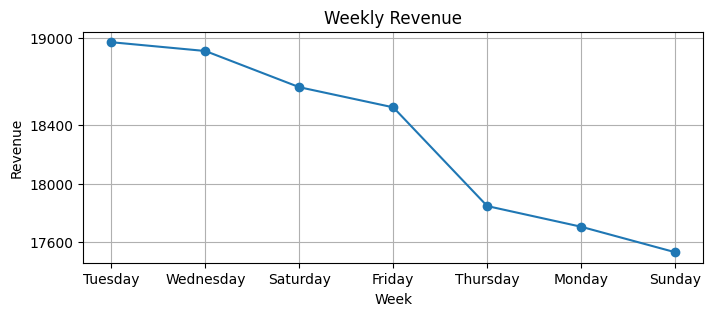

<Axes: title={'center': 'Weekly Revenue'}, xlabel='day_of_week'>

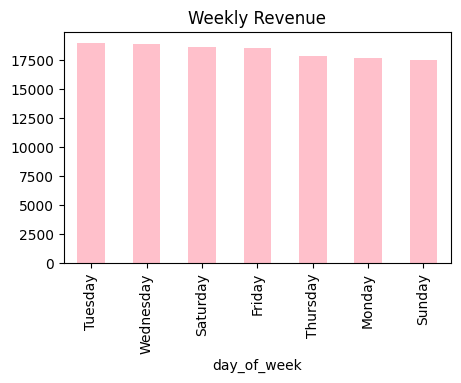

In [63]:
# Your code here
#df["order_date"] = pd.to_datetime(df["order_date"])
#df["week"] = df["order_date"].dt.to_period("D")
weekly_revenue = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)

print(" The weekdays are usually busier than the weekends, with sunday bringing in the least revenue.")

weekly_revenue.plot(kind="line", marker="o", figsize=(8,3))
plt.title("Weekly Revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.grid(True)
plt.yticks([17600, 18000, 18400, 19000])

plt.show()

weekly_revenue.plot(kind='bar', figsize=(5,3), title='Weekly Revenue', color = "pink")

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Total Profit:
25628.13

Profit by Region:
region
South    6967.89
North    6870.34
East     6244.36
West     5545.55
Name: profit, dtype: float64

The most profitable region is the South.


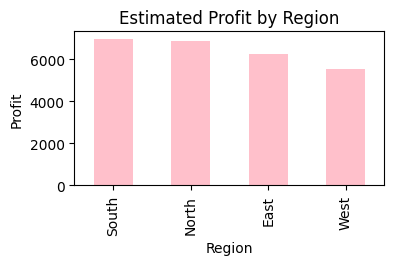

In [80]:
# Your code here
df["profit"] = df["revenue"] * 0.2

total_profit = df["profit"].sum().round(2)
print("Total Profit:")
print(total_profit)
print()

regional_profit = df.groupby("region")["profit"].sum().round(2).sort_values(ascending=False)
print("Profit by Region:")
print(regional_profit)

print()
print("The most profitable region is the South.")
regional_profit.plot(kind="bar", figsize=(4,2), color="pink", title="Estimated Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

Based on the data provided, a good business strategy would be to focus on the areas that generate higher revenue, and expand and promote from there. The regions, customer segments, and product categories generate higher revenue, and those insights expand and promote growth
For example, on days like Tuesday, Wednesday, Saturday, and Friday, there are higher sales. These peak days are an good opportunity to schedule promotional events, special discounts, or marketing campaigns to  drive customer engagement and maximize revenue. 

Furthermore, focusing on the South and the Northern areas, which have high revenue, will bring even more revenue. After more money is generated in these areas, the focus can be turnt to the East and West, to bring the spending up to the same standards of spending in the South and North.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.